## **1- Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import imageio
import matplotlib.image as img
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import os
from tensorflow.keras.models import *

## **2- read dataset**

In [2]:
# read images
train_path = r"C:\Users\Rabab\Downloads\archive (3)\Covid19-dataset\test"
test_path = r"C:\Users\Rabab\Downloads\archive (3)\Covid19-dataset\test"

image_category = os.listdir(r'C:\Users\Rabab\Downloads\archive (3)\Covid19-dataset\test')

## **Visualizing images**

In [3]:
# import libraries
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [4]:
#plotting images 
def plot_images(image_category):
    
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(image_category):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img) / 255
        
        plt.subplot(1,3, i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        
    plt.show()   

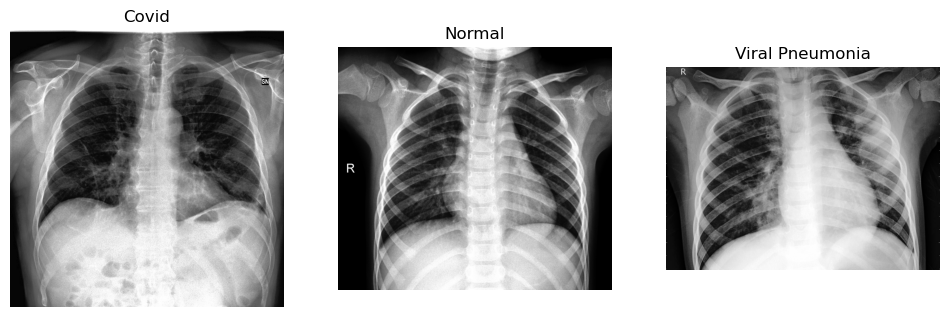

In [5]:
plot_images(image_category)

## **4- data augmentation**

In [6]:
# data augmentation
data_aug = ImageDataGenerator(rescale = 1.0/255.0)

In [7]:
#1- train data
train_data = data_aug.flow_from_directory(
                                                train_path,
                                                target_size = (224,224),
                                                batch_size = 10,
                                                )

Found 66 images belonging to 3 classes.


In [8]:
#2- test data
test_data = data_aug.flow_from_directory(
                                                test_path,
                                                target_size = (224,224),
                                                batch_size = 10,
                                                )

Found 66 images belonging to 3 classes.


## **5- model building**

In [9]:
#model building
cnn_model = Sequential()

#add layers
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu', input_shape = [224,224,3]))

cnn_model.add(MaxPooling2D(pool_size= (2,2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters = 128, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())

#flatten layer
cnn_model.add(Flatten())

#fully connected cnn
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(64, activation = 'relu'))

cnn_model.add(Dense(3, activation = 'softmax'))

## **6- compile model**

In [10]:
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

## **7- fit model**

In [11]:
model_history = cnn_model.fit(train_data,
                             epochs = 5,
                             validation_data = test_data,
                             )

Epoch 1/5
7/7 [==============================] - 8s 975ms/step - loss: 1.4926 - accuracy: 0.3333 - val_loss: 1.0195 - val_accuracy: 0.7121
Epoch 2/5
7/7 [==============================] - 6s 832ms/step - loss: 0.8960 - accuracy: 0.7273 - val_loss: 0.5589 - val_accuracy: 0.7576
Epoch 3/5
7/7 [==============================] - 6s 847ms/step - loss: 0.6039 - accuracy: 0.7121 - val_loss: 0.3788 - val_accuracy: 0.8939
Epoch 4/5
7/7 [==============================] - 6s 818ms/step - loss: 0.2149 - accuracy: 0.9697 - val_loss: 0.0757 - val_accuracy: 0.9697
Epoch 5/5
7/7 [==============================] - 5s 792ms/step - loss: 0.1306 - accuracy: 0.9545 - val_loss: 0.0596 - val_accuracy: 0.9697


## **8- plotting**

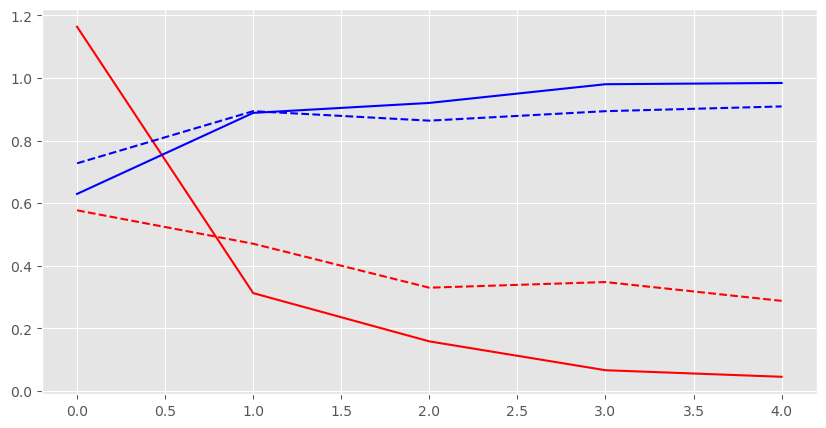

In [27]:
#plot error and accuracy
h = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

plt.plot(h['loss'], c = 'red', label = 'training loss')
plt.plot(h['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

plt.plot(h['accuracy'], c = 'blue', label = 'training accuracy')
plt.plot(h['val_accuracy'], c = 'blue', label = 'training loss', linestyle = '--')

## **9- Evaluation**

In [28]:
cnn_model.evaluate(test_data)

7/7 [==============================] - 4s 572ms/step - loss: 0.2876 - accuracy: 0.9091


[0.2876274585723877, 0.9090909361839294]

In [29]:
cnn_model.evaluate(train_data)

26/26 [==============================] - 22s 838ms/step - loss: 0.0448 - accuracy: 0.9880


[0.04475131258368492, 0.9880478382110596]

## **10- predict new image**

In [12]:
testing_image = r'Downloads/x-ray-image-_covid_19.jpg'

In [13]:
class_map = dict([v,k] for k,v in train_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [14]:
import numpy as np
from PIL import Image
from keras.preprocessing import image

def predictions(testing_image, actual_label):
    
    #load and preprocessing image
    test_img = image.load_img(testing_image, target_size = (224,224))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))
    
    #make prediction
    predicted_label = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_label]
    
    
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("predicted label: {}, actual label : {}".format (predicted_img, actual_label))
    plt.grid()
    plt.axis('off')

1/1 [==============================] - 0s 366ms/step


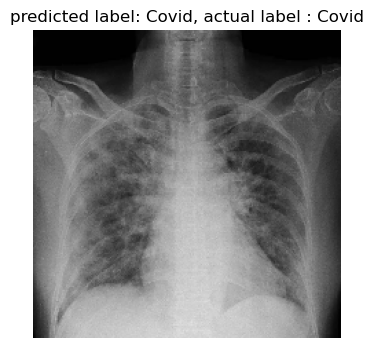

In [17]:
predictions(testing_image, actual_label= 'Covid')

In [39]:
#save model
cnn_model.save('covid_19_model.h5')

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
